In [2]:
import cv2

In [3]:
img1=cv2.imread("einstein.jpg")

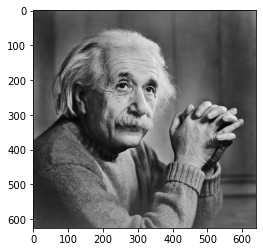

In [4]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from matplotlib import pyplot as plt

#Import image
image = cv2.imread("einstein.jpg")

#Show the image with matplotlib
plt.imshow(image)
plt.show()

In [8]:
gauss_nine=cv2.GaussianBlur(image,(9,9),0)
gauss_five=cv2.GaussianBlur(image,(5,5),0)

In [9]:
gauss=gauss_nine-gauss_five

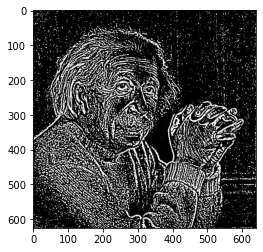

In [11]:
plt.imshow(gauss)

In [1]:
#__________________

In [89]:
cap=cv2.VideoCapture('IGVC 2015 UNSW Advanced Course GoPro - Speed Record.mp4')

In [110]:
target = cv2.imread('barrel.png')
target_hsv = cv2.cvtColor(target, cv2.COLOR_BGR2HSV)

target_histogram = cv2.calcHist([target_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
final=cv2.normalize(target_histogram, target_histogram, 0, 255, cv2.NORM_MINMAX)

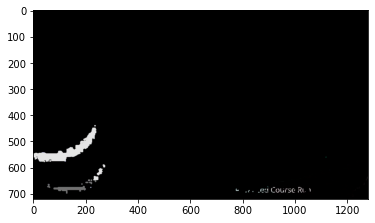

In [111]:
import numpy as np
if not cap.isOpened():
    print("Cannot open camera")
    exit()
a=True
allimg=[]
count=0
while a:
    count+=1
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    allimg.append(gray)
    dst = cv2.calcBackProject([gray],[0,1],final,[0,180,0,256],1)
    # Now convolute with circular disc
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    cv2.filter2D(dst,-1,disc,dst)
    # threshold and binary AND
    ret,thresh = cv2.threshold(dst,20,255, cv2.THRESH_BINARY)
    thresh = cv2.merge((thresh,thresh,thresh))
    res = cv2.bitwise_and(frame,thresh)
#     res = np.vstack((target,thresh,res))
    plt.imshow(res)
    
    
    
    if count>100:
        a=False
    # Display the resulting frame